# ライブラリ読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

# データの読み込み

In [5]:
train_raw = pd.read_csv('train.csv')
train = train_raw.copy()
train

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [6]:
test_raw = pd.read_csv('test.csv')
test = test_raw.copy()
test

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [7]:
sub_raw = pd.read_csv("sample_submission.csv")
sub = sub_raw.copy()
sub

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


# 予測結果読み込み

In [8]:
result_lstm = pd.read_csv("result_LSTM.csv")
result_lstm

,kind,date,mode_price
0,だいこん,20220502,982.38745
1,だいこん,20220506,954.86850
2,だいこん,20220507,974.04120
3,だいこん,20220509,966.07605
4,だいこん,20220510,961.61520
...,...,...,...
315,ミニトマト,20220526,134.46965
316,ミニトマト,20220527,133.99242
317,ミニトマト,20220528,134.12180
318,ミニトマト,20220530,132.03308


In [9]:
result_prophet = pd.read_csv("result_prophet.csv")
result_prophet

,kind,date,mode_price
0,だいこん,20220502,853.775550
1,だいこん,20220506,835.035522
2,だいこん,20220507,820.898149
3,だいこん,20220509,822.616543
4,だいこん,20220510,825.684007
...,...,...,...
315,ミニトマト,20220526,95.767513
316,ミニトマト,20220527,95.853024
317,ミニトマト,20220528,97.241873
318,ミニトマト,20220530,97.441669


# Ensemble

## LSTM:Prophet=5:5

In [10]:
df_result = pd.merge(result_lstm, result_prophet, how="left", on=["kind", "date"])

In [11]:
df_result["LSTM5_Prophet5"] = (df_result["mode_price_x"] + df_result["mode_price_y"])/2
df_result = df_result.rename(columns={"mode_price_x":"LSTM","mode_price_y":"Prophet"})
df_result

,kind,date,LSTM,Prophet,LSTM5_Prophet5
0,だいこん,20220502,982.38745,853.775550,918.081500
1,だいこん,20220506,954.86850,835.035522,894.952011
2,だいこん,20220507,974.04120,820.898149,897.469674
3,だいこん,20220509,966.07605,822.616543,894.346297
4,だいこん,20220510,961.61520,825.684007,893.649604
...,...,...,...,...,...
315,ミニトマト,20220526,134.46965,95.767513,115.118581
316,ミニトマト,20220527,133.99242,95.853024,114.922722
317,ミニトマト,20220528,134.12180,97.241873,115.681837
318,ミニトマト,20220530,132.03308,97.441669,114.737375


### for文で予測値をプロット

だいこん


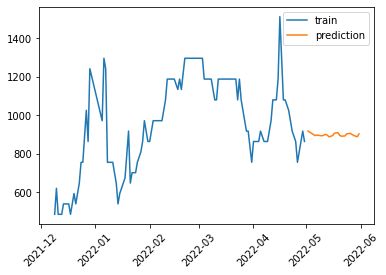

にんじん


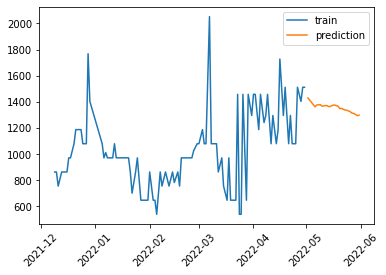

キャベツ


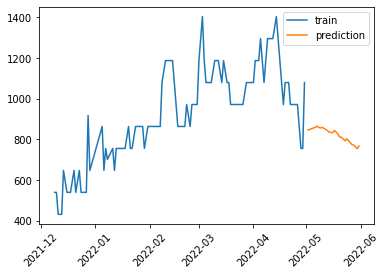

レタス


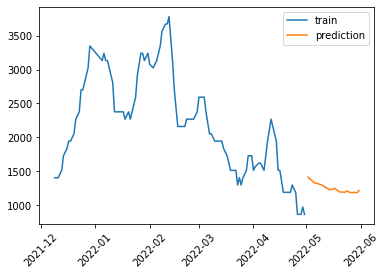

はくさい


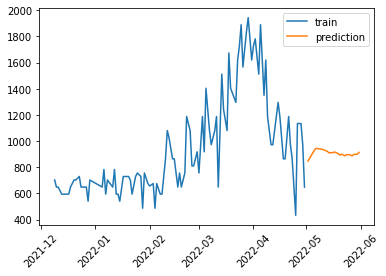

こまつな


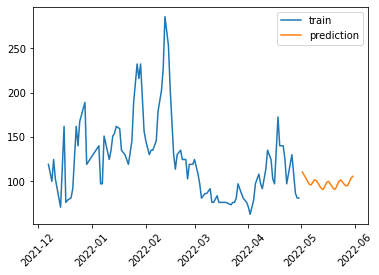

ほうれんそう


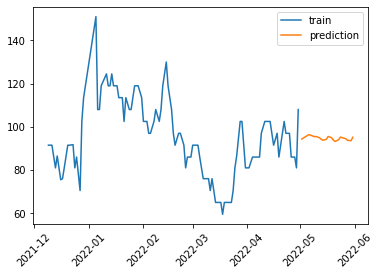

ねぎ


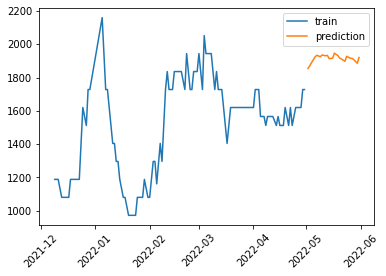

きゅうり


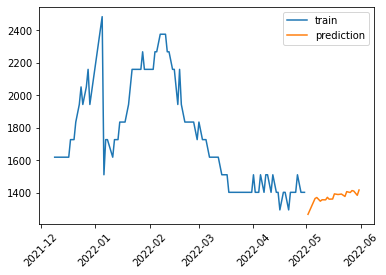

トマト


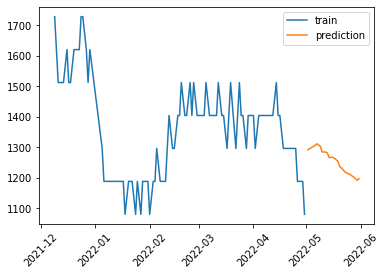

ピーマン


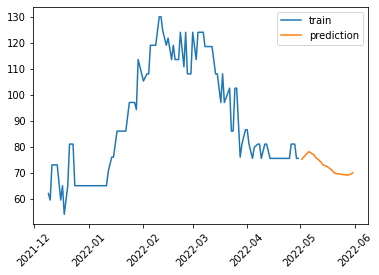

じゃがいも


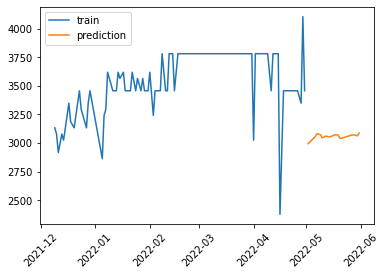

なましいたけ


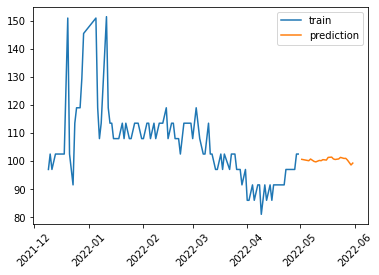

セルリー


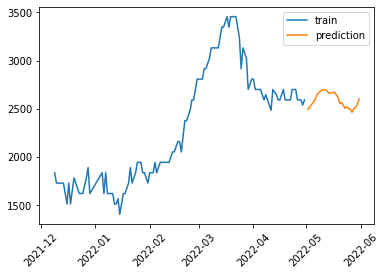

そらまめ


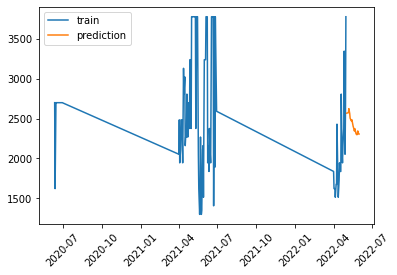

ミニトマト


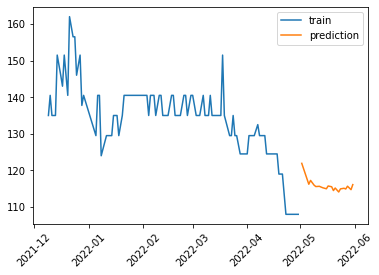

In [12]:
for kind_name in test["kind"].unique():
    print(kind_name)
    forecast_kind = df_result[df_result["kind"]==kind_name]
    forecast_kind["date"] = pd.to_datetime(forecast_kind["date"], format="%Y%m%d")
    forecast_kind['date'] = forecast_kind['date'].astype(str)
    forecast_kind["date"] = pd.to_datetime(forecast_kind['date'])
    
    df_kind = train[train["kind"]==kind_name]
    df_kind['date'] = df_kind['date'].astype(str)
    df_kind['date'] = pd.to_datetime(df_kind['date'])
    
    plt.figure()
    plt.plot(df_kind.set_index("date").tail(100)[["mode_price"]])
    plt.plot(forecast_kind.set_index("date")[["LSTM5_Prophet5"]])
    plt.xticks(rotation=45)
    plt.legend(["train","prediction"])
    plt.show()

## 目視で予測精度高そうな野菜を選択

In [13]:
LSTM_kind = ["だいこん" ,"キャベツ" ,"ねぎ" ,"ピーマン", "なましいたけ"]
Prophet_kind = ["にんじん" ,"レタス" ,"はくさい", "こまつな", "ほうれんそう", "じゃがいも", "そらまめ"]
L5_P5_kind = ["きゅうり" ,"トマト" ,"セルリー" ,"ミニトマト"]

In [14]:
LSTM_df = df_result[df_result.kind.isin(LSTM_kind)][["kind","date","LSTM"]]
Prophet_df = df_result[df_result.kind.isin(Prophet_kind)][["kind","date","Prophet"]]
L5_P5_df = df_result[df_result.kind.isin(L5_P5_kind)][["kind","date","LSTM5_Prophet5"]]
selected_df = pd.concat([LSTM_df, Prophet_df, L5_P5_df])
selected_df

,kind,date,LSTM,Prophet,LSTM5_Prophet5
0,だいこん,20220502,982.38745,NaN,NaN
1,だいこん,20220506,954.86850,NaN,NaN
2,だいこん,20220507,974.04120,NaN,NaN
3,だいこん,20220509,966.07605,NaN,NaN
4,だいこん,20220510,961.61520,NaN,NaN
...,...,...,...,...,...
315,ミニトマト,20220526,NaN,NaN,115.118581
316,ミニトマト,20220527,NaN,NaN,114.922722
317,ミニトマト,20220528,NaN,NaN,115.681837
318,ミニトマト,20220530,NaN,NaN,114.737375


In [15]:
df_result = pd.merge(sub.drop("mode_price", axis=1), selected_df, how="left", on=["kind", "date"])
df_result = df_result.fillna(0)
df_result["mode_price"] = df_result["LSTM"]+df_result["Prophet"]+df_result["LSTM5_Prophet5"]
df_result

,kind,date,LSTM,Prophet,LSTM5_Prophet5,mode_price
0,だいこん,20220502,982.38745,0.0,0.000000,982.387450
1,だいこん,20220506,954.86850,0.0,0.000000,954.868500
2,だいこん,20220507,974.04120,0.0,0.000000,974.041200
3,だいこん,20220509,966.07605,0.0,0.000000,966.076050
4,だいこん,20220510,961.61520,0.0,0.000000,961.615200
...,...,...,...,...,...,...
315,ミニトマト,20220526,0.00000,0.0,115.118581,115.118581
316,ミニトマト,20220527,0.00000,0.0,114.922722,114.922722
317,ミニトマト,20220528,0.00000,0.0,115.681837,115.681837
318,ミニトマト,20220530,0.00000,0.0,114.737375,114.737375


In [16]:
df_result = df_result.drop(["LSTM", "Prophet", "LSTM5_Prophet5"], axis=1)
df_result

,kind,date,mode_price
0,だいこん,20220502,982.387450
1,だいこん,20220506,954.868500
2,だいこん,20220507,974.041200
3,だいこん,20220509,966.076050
4,だいこん,20220510,961.615200
...,...,...,...
315,ミニトマト,20220526,115.118581
316,ミニトマト,20220527,114.922722
317,ミニトマト,20220528,115.681837
318,ミニトマト,20220530,114.737375


In [17]:
df_result.to_csv("result_LSTM_prophet_selected.csv", index=False, encoding="utf_8_sig")

In [18]:
# 単純に5:5
# df_result["mode_price"] = (df_result["mode_price_x"] + df_result["mode_price_y"])/2
# df_result.drop(["mode_price_x", "mode_price_y"], axis=1)
# df_result.drop(["mode_price_x", "mode_price_y"], axis=1).to_csv("result_LSTM5_prophet5.csv", index=False, encoding="utf_8_sig")

### for文で予測値をプロット

だいこん


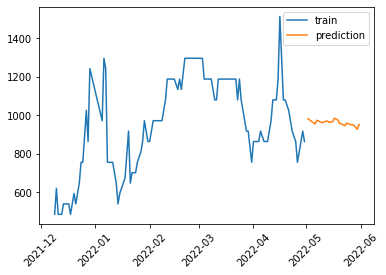

にんじん


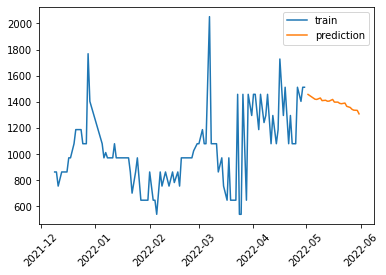

キャベツ


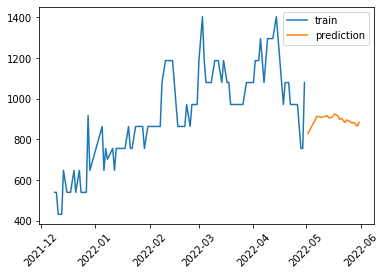

レタス


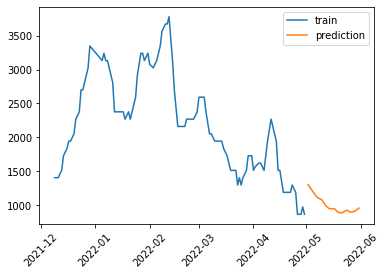

はくさい


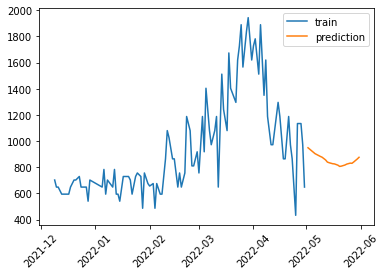

こまつな


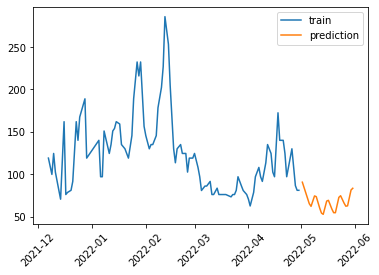

ほうれんそう


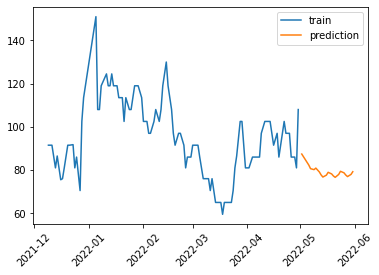

ねぎ


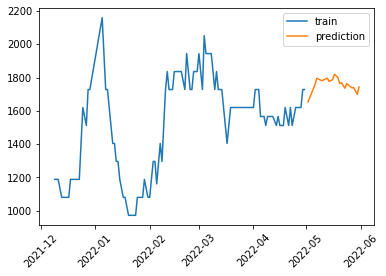

きゅうり


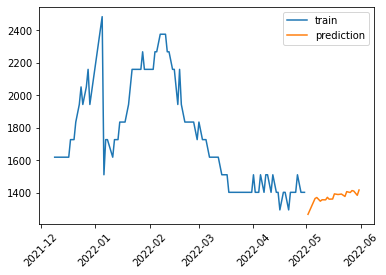

トマト


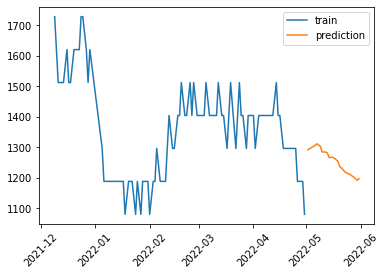

ピーマン


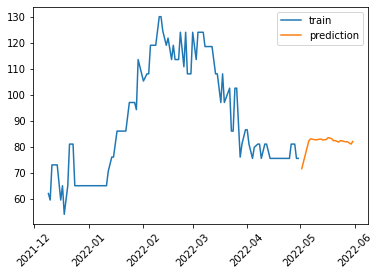

じゃがいも


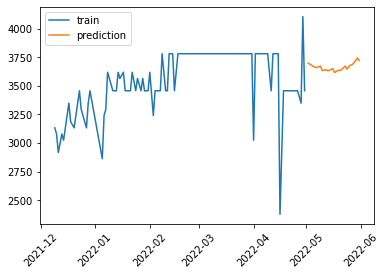

なましいたけ


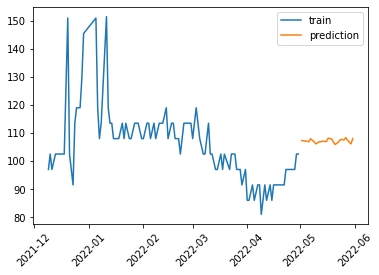

セルリー


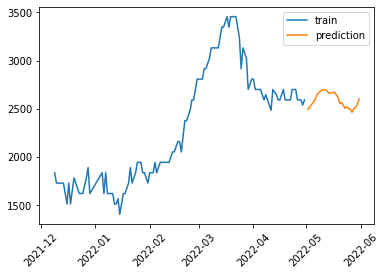

そらまめ


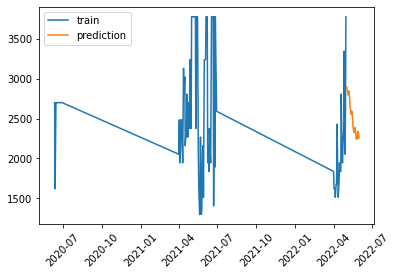

ミニトマト


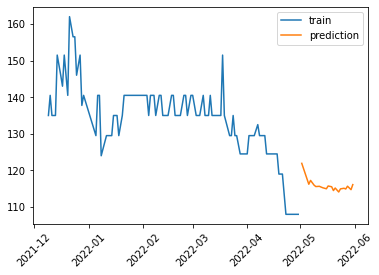

In [19]:
for kind_name in test["kind"].unique():
    print(kind_name)
    forecast_kind = df_result[df_result["kind"]==kind_name]
    forecast_kind["date"] = pd.to_datetime(forecast_kind["date"], format="%Y%m%d")
    forecast_kind['date'] = forecast_kind['date'].astype(str)
    forecast_kind["date"] = pd.to_datetime(forecast_kind['date'])
    
    df_kind = train[train["kind"]==kind_name]
    df_kind['date'] = df_kind['date'].astype(str)
    df_kind['date'] = pd.to_datetime(df_kind['date'])
    
    plt.figure()
    plt.plot(df_kind.set_index("date").tail(100)[["mode_price"]])
    plt.plot(forecast_kind.set_index("date")[["mode_price"]])
    plt.xticks(rotation=45)
    plt.legend(["train","prediction"])
    plt.show()